# Pseudorapidity

In this exercise it will be shortly studied how pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution.

As it was told in the theory part in week 2 notebook, pseudorapidity $\eta$ describes an angle of which the detected particle has differed from the particle beam (z-axis). Pseudorapidity is determined with the angle $\theta$ mentioned before with the equation

$$
\eta = -\ln(\tan(\frac{\theta}{2}))
$$

From the image 1 we can see that a small pseudorapidity in practice means that the particle has differed a lot from the particle beam. Similarly greater pseudorapidity means that the particle has continued almost among the beam line after the collision.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 1: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

The image 2 below shows a situation where two particle beams from left and right collide. The image shows two muons with different pseudorapidities. The muon with the smaller pseudorapidity hits the barrel part of the detector when the muon with the greater pseudorapidity goes to the endcap of the detector. There are also muon chambers in the both ends of the detector so these muons can also be detected.

<figure>
    <img src="../images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 2: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

In this exercise our goal is to draw two histograms. One shows such muon pairs that have small pseudorapidities and the other shows muon pairs with large pseudorapidities.

## Part 1 - Pseudorapidity graph

In order to see better how pseudorapidity $\eta$ and the angle $\theta$ are related, we can plot $\eta$ as a function of $\theta$. Define a function pseudorapidity(theta) that takes the angle theta in degrees and returns the value of the pseudorapidity. Return your code to Moodle. Then use your function to plot the pseudorapidity for $\theta \in \mathopen[1^{\circ},179^{\circ}\mathclose]$. 

In [55]:
# plot pseudorapidity for theta=[1,179] degrees.

import numpy as np
import matplotlib.pyplot as plt

def pseudorapidity(theta):
    # argument theta in degrees
    theta = np.radians(theta)
    return -np.log(np.tan(theta/2))

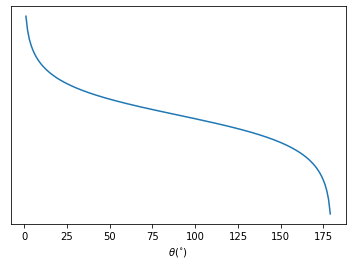

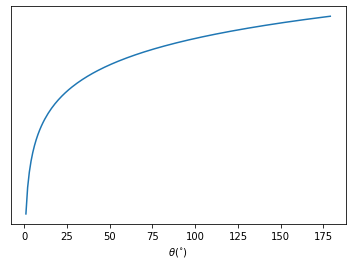

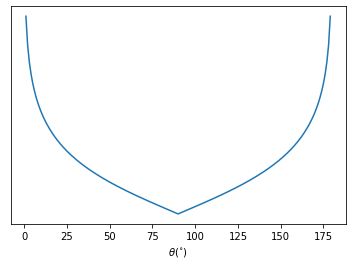

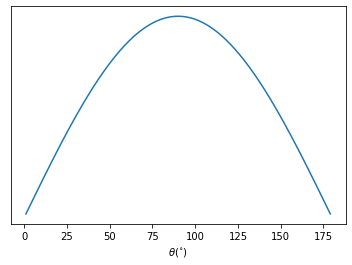

In [58]:
# define a couple of fake cases for Moodle questions

theta = np.linspace(1,179,179)

# Fake answers for moodle question
eta_fake1 = np.log(np.radians(theta)/8)
eta_fake2 = np.abs(-np.log(np.tan(np.radians(theta)/2)))
eta_fake3 = np.sin(np.radians(theta))

etas = [pseudorapidity(theta), eta_fake1, eta_fake2, eta_fake3]

n=0
for eta in etas:
    plt.figure()
    plt.plot(theta_deg,eta)
    plt.xlabel(r'$\theta (^{\circ})$')
    plt.yticks([])
    if n==0:
        figname = 'pseudorapidity.png'
    else:
        figname = 'fake_pseudorapidity_{}.png'.format(n)
    plt.savefig(figname)
    n+=1

plt.show()

## Part 2 - selecting events from data

instructions here ...

last year:

Next let’s create two variables for dividing the events: `small_etas` and `great_etas`. To the first one will be saved only collision events where pseudorapidities of the both detected muons have been small (for example under 0.38). And respectively to the second those whose pseudorapidities have been great (for example over 1.52). Absolute values will be used because $\eta$ can get also negative values.

Complete the code cell below by determining the variables `small_etas` and `great_etas` in a way that the division described above will be made. You will need the following functions:

- `ds[condition]` selects from the variable `ds` only events which fulfill the condition written inside the brackets. There can also be more than one condition. Then the function is in the form `ds[(condition1) & (condition2)]`
- an example of this could be a function where from the variable `example` only rows where the values of the columns `a` and `b` have been both greater than 8 would be selected: `example[(example.a > 8) & (example.b > 8)]`
- you can get the absolute values with the function `np.absolute()` from the _numpy_ module
- pseudorapidity of the first muon is `ds.eta1` and the second `ds.eta2`
- ”greater than” and ”smaller than” comparisons can be made in Python straight with the symbols > and <
- Python uses a dot as a decimal separator (for example 0.38)

In [39]:
# Let's import the needed modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# With this line the data is imported and saved to the variable "ds".
ds = pd.read_csv('../Week3/DoubleMuRun2011A.csv')

lower_limit = 0.38
upper_limit = 1.52
great_etas = ds[(abs(ds.eta1) > upper_limit) & (abs(ds.eta2) > upper_limit)]
small_etas = ds[(abs(ds.eta1) < lower_limit) & (abs(ds.eta2) < lower_limit)]

# Let's print out some information about the selection
print('Amount of all events = %d' % len(ds))
print('Amount of the events where the pseudorapidity of the both muons have been large = %d' %len(great_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small = %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large = 34263
Amount of the events where the pseudorapidity of the both muons have been small = 34337


## Part 3 - Plotting the histograms


instructions here ...

last year:

Run the code cell below to create separate histograms from the events with small and with great values of pseudorapidities. The cell will get the invariant masses for both of the selections and will create the histograms out of them near to the peak that refers to the Z boson.

Your final task is to plot the two histograms. After that fit both plots with the Breit-Wigner fit and study the differences betheen the high and low eta regions.

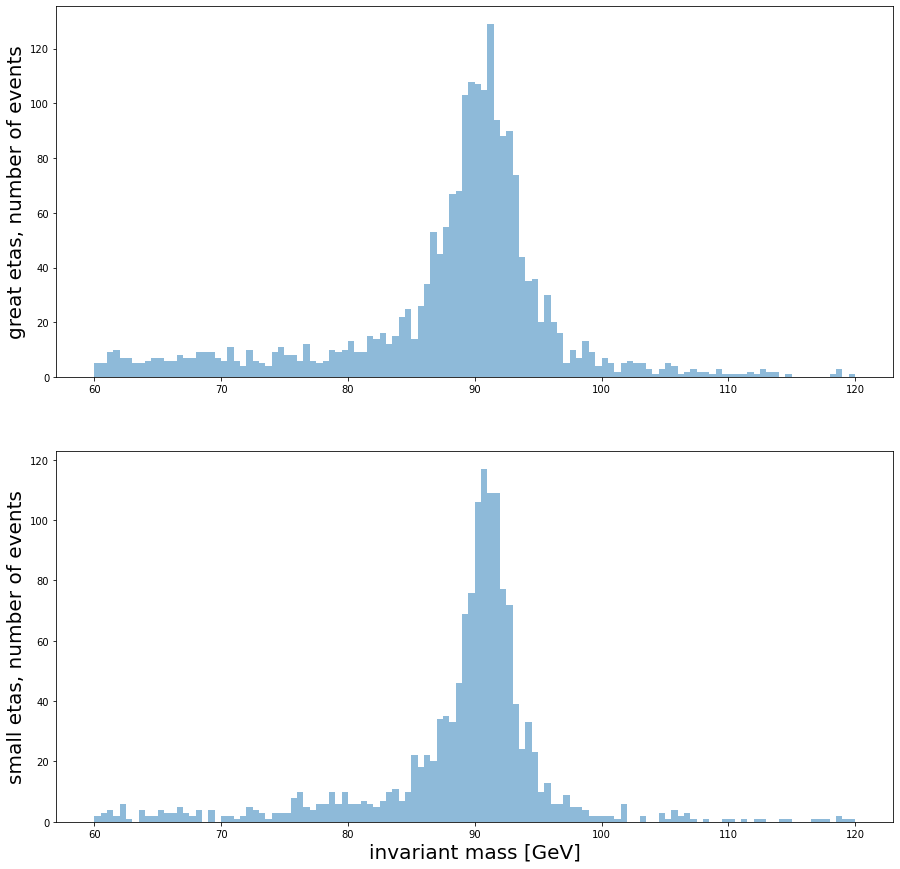

In [40]:
# Let's differ the invariant masses of the large and small pseudorapidity
# events for making the histograms.
inv_mass_great = great_etas['M']
inv_mass_small = small_etas['M']

# Let's use the matplotlib.pyplot module to create a custom size
# figure where the two histograms will be plotted.
f = plt.figure(figsize=(15,15))
plt.subplot(211)
histlarge, binslarge, patches = plt.hist(inv_mass_great, bins=120, range=(60,120), alpha=0.5)
plt.ylabel('great etas, number of events', fontsize=20)
plt.subplot(212)
histsmall, binssmall, patches = plt.hist(inv_mass_small, bins=120, range=(60,120), alpha=0.5)
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

In [41]:
# possible solution

def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [42]:
# possible solution

def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
binslarge = bin_centers(binslarge)
binssmall = bin_centers(binssmall)

gamma = 5.288 +/- 0.163
M     = 90.741 +/- 0.050
a     = -0.120 +/- 0.024
b     = 12.474 +/- 2.201
A     = 968.995 +/- 24.250
gamma = 3.652 +/- 0.096
M     = 90.970 +/- 0.031
a     = -0.061 +/- 0.018
b     = 6.363 +/- 1.629
A     = 674.983 +/- 13.777


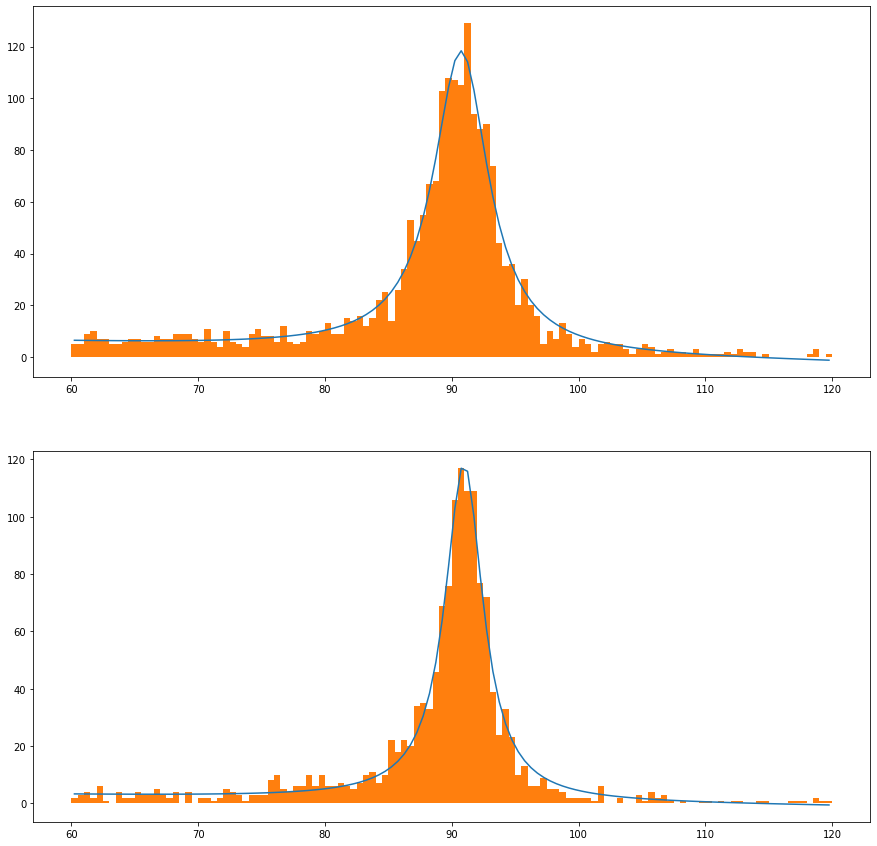

In [49]:
from scipy.optimize import curve_fit

accuracy = 1e-5
p0 = [5, 90, -1, 100, 10000]
while True: # Loop until desired accuracy
    bestlarge, covariancelarge = curve_fit(breitwigner, binslarge, histlarge, p0=p0)
    error = max(abs(p0-bestlarge))
    if error < accuracy: 
        break
    p0 = bestlarge
    
while True: # Loop until desired accuracy
    bestsmall, covariancesmall = curve_fit(breitwigner, binssmall, histsmall, p0=p0)
    error = max(abs(p0-bestsmall))
    if error < accuracy: 
        break
    p0 = bestsmall
    
f = plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(binslarge, breitwigner(np.array(binslarge), *bestlarge))
plt.hist(inv_mass_great, bins=120, range=(60,120))
errorslarge = np.sqrt(np.diag(covariancelarge))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(bestlarge)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(bestlarge[i],errorslarge[i],param_strings[i]))
    
plt.subplot(212)
plt.plot(binssmall, breitwigner(np.array(binssmall), *bestsmall))
plt.hist(inv_mass_small, bins=120, range=(60,120))
errorssmall = np.sqrt(np.diag(covariancesmall))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(bestsmall)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(bestsmall[i],errorssmall[i],param_strings[i]))
plt.show()